## Locally Weighted Linear Regression (LWR)

Example of locally weighted linear regression. Please check [my blog](http://yueyublog.com/posts/locally-weighted-regression)
or [this assignment](https://github.com/genkiyui/cs229-solutions-fall2018/blob/main/problem_set_1/PS1-5%20Locally%20weighted%20linear%20regression.ipynb)
for details.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

Load the training set. This data is from the assignment 1 (fall 2018) of [CS229](http://cs229.stanford.edu/).

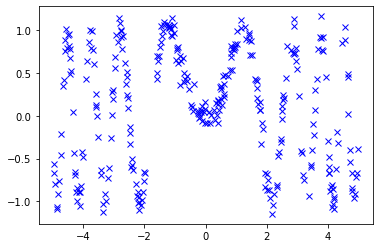

In [2]:
D_train = np.loadtxt('data/train.csv', delimiter=',', skiprows=1)
D_test = np.loadtxt('data/valid.csv', delimiter=',', skiprows=1)

X_train, y_train = D_train[:, 0], D_train[:, 1]
X_train = PolynomialFeatures(degree=1).fit_transform(X_train.reshape((-1, 1)))

X_valid, y_valid = D_test[:, 0], D_test[:, 1]
X_valid = PolynomialFeatures(degree=1).fit_transform(X_valid.reshape((-1, 1)))

plt.plot(X_train[:, 1:], y_train, 'bx')

In [3]:
class LocallyWeightedLinearRegression:

    def __init__(self, tau):
        self.tau = tau
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        L, M = X.shape

        # Reshape the input X by adding an additional dimension for broadcast
        H = np.exp(- np.linalg.norm(self.X - np.reshape(X, (L, -1, M)), ord=2, axis=2)**2 / (2 * self.tau**2))

        # Turn the weights into diagonal matrices, each corresponds to a single input. Shape (L, N, N)
        H = np.apply_along_axis(np.diag, axis=1, arr=H)

        # Compute W for each input x_n. Shape (L, M)
        W = np.linalg.inv(self.X.T @ H @ self.X) @ self.X.T @ H @ self.y

        return np.einsum('ij,ij->i', X, W)

We need to tune the bandwidth parameter $\tau$ using the validation set.

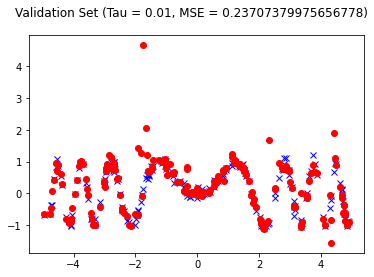

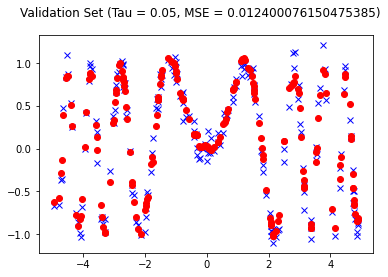

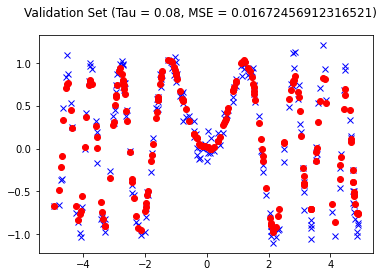

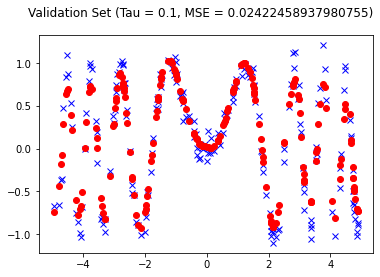

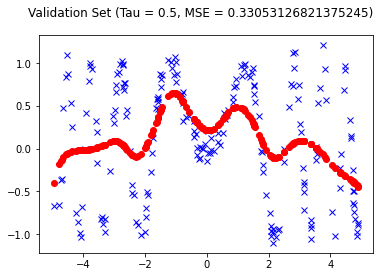

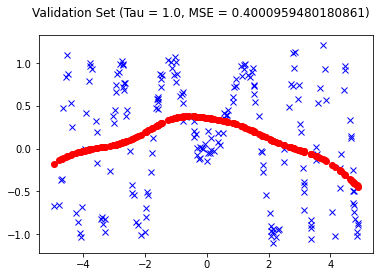

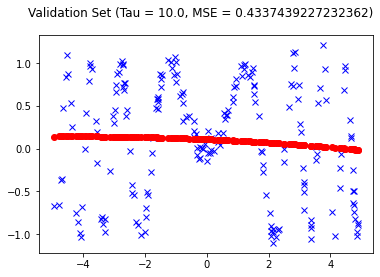

In [4]:
# Some candidates for tau
taus = [1e-2, 5e-2, 8e-2, 1e-1, 5e-1, 1e0, 1e1]

lowest_mse = math.inf
best_tau = taus[0]

for tau in taus:
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(X_train, y_train)
    y_valid_pred = clf.predict(X_valid)

    mse = np.mean((y_valid_pred - y_valid)**2)
    if mse < lowest_mse:
        lowest_mse = mse
        best_tau = tau

    plt.figure()
    plt.plot(X_valid[:, 1], y_valid, 'bx')
    plt.plot(X_valid[:, 1], y_valid_pred, 'ro')
    plt.suptitle(f'Validation Set (Tau = {tau}, MSE = {mse})')

We can see that $\tau = 0.05$ gives the lowest MSE on validation set.